<a href="https://colab.research.google.com/github/EEdwardsA/DS-Unit-2-Kaggle-Challenge/blob/master/module2-random-forests/LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
def wrangle(X):
  # Make a copy
  X = X.copy()
  X = X.set_index('id')
  # Drop high cardinality cols
  high_card_cols = [col for col in X.select_dtypes('object').columns
                     if X[col].nunique() > 100]

  X.drop(columns=high_card_cols, inplace=True)

  # Drop repeated columns
  cols = ['quantity_group','extraction_type_group','payment_type']
  X.drop(columns=cols, inplace=True) 

  return X

In [4]:
train = wrangle(train)

In [5]:
test = wrangle(test)

In [6]:
target = 'status_group'

y = train[target]
X = train.drop(target, axis=1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42,
                           )
)

model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
training_acc = model.score(X_train, y_train)
validation_acc = model.score(X_val, y_val)

print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.9952230639730639
Validation Accuracy: 0.8015993265993266


In [9]:
model2 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(max_samples=.5, random_state=42)
)

model2.fit(X_train, y_train);

In [12]:
training_acc_2 = model2.score(X_train, y_train)
validation_acc_2 = model2.score(X_val, y_val)

print('Training Accuracy:', training_acc_2)
print('Validation Accuracy:', validation_acc_2)

Training Accuracy: 0.953766835016835
Validation Accuracy: 0.8088383838383838


In [10]:
import numpy as np

In [16]:
train_acc = []
val_acc = []

for sample in np.arange(1505,1515, 1):
  print('training model with n_estimators:', sample)
  forest_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      RandomForestClassifier(n_estimators=sample,
                            max_samples=0.5,
                            random_state=42,
                            n_jobs=-1)
  )

  forest_model.fit(X_train, y_train)

  train_acc.append(forest_model.score(X_train, y_train))
  val_acc.append(forest_model.score(X_val, y_val))

training model with n_estimators: 1505
training model with n_estimators: 1506
training model with n_estimators: 1507
training model with n_estimators: 1508
training model with n_estimators: 1509
training model with n_estimators: 1510
training model with n_estimators: 1511
training model with n_estimators: 1512
training model with n_estimators: 1513
training model with n_estimators: 1514


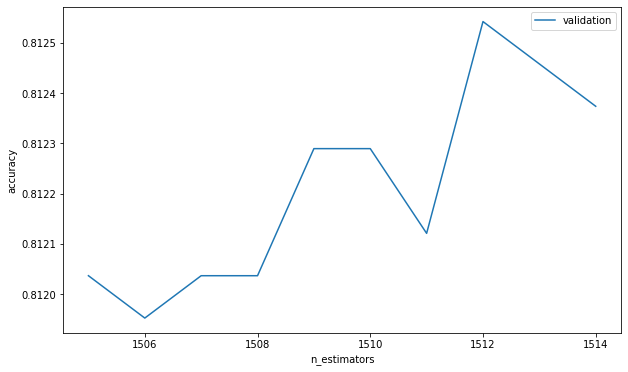

In [17]:
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(1505,1515, 1), val_acc, label='validation')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend();

In [16]:
train_acc = []
val_acc = []

for sample in np.arange(80, 400, 20):
  print('training model with n_estimators:', sample)
  forest_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      RandomForestClassifier(n_estimators=sample,
                            max_samples=0.5,
                            random_state=42,
                            n_jobs=-1)
  )

  forest_model.fit(X_train, y_train)

  train_acc.append(forest_model.score(X_train, y_train))
  val_acc.append(forest_model.score(X_val, y_val))

training model with n_estimators: 80
training model with n_estimators: 100
training model with n_estimators: 120


KeyboardInterrupt: ignored

In [ ]:
train_acc = [0.96439394, 0.96607744, 0.96624579, 0.96691919, 0.96767677,
         0.96790825, 0.96845539, 0.96914983, 0.96938131, 0.96984428,
         0.96980219, 0.96994949, 0.97005471, 0.96994949, 0.96992845,
         0.96971801]
val_acc = [0.81111111, 0.81212121, 0.81153199, 0.81313131, 0.81372054,
         0.81363636, 0.81363636, 0.81380471, 0.81329966, 0.81380471,
         0.81380471, 0.81296296, 0.81355219, 0.81346801, 0.81346801,
         0.81481481]

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(80, 400, 20), val_acc, label='validation')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
val_acc

In [ ]:
train_acc = []
val_acc = []

for sample in np.arange(350, 450, 5):
  print('training model with n_estimators:', sample)
  forest_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      RandomForestClassifier(n_estimators=sample,
                            max_samples=0.5,
                            random_state=42,
                            n_jobs=-1)
  )

  forest_model.fit(X_train, y_train)

  train_acc.append(forest_model.score(X_train, y_train))
  val_acc.append(forest_model.score(X_val, y_val))

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(350, 450, 5), val_acc, label='validation')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
train_acc = []
val_acc = []

for sample in np.arange(420, 430, 1):
  print('training model with n_estimators:', sample)
  forest_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      RandomForestClassifier(n_estimators=sample,
                            max_samples=0.5,
                            random_state=42,
                            n_jobs=-1)
  )

  forest_model.fit(X_train, y_train)

  train_acc.append(forest_model.score(X_train, y_train))
  val_acc.append(forest_model.score(X_val, y_val))

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(420, 430, 1), val_acc, label='validation')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend();

In [18]:
model3 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=1512, max_samples=.5, random_state=42)
)

model3.fit(X_train, y_train);

In [19]:
training_acc_3 = model3.score(X_train, y_train)
validation_acc_3 = model3.score(X_val, y_val)

print('Training Accuracy:', training_acc_3)
print('Validation Accuracy:', validation_acc_3)

Training Accuracy: 0.9564393939393939
Validation Accuracy: 0.8125420875420876


In [20]:
model4 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(criterion='entropy',
                           n_estimators=1512, 
                           max_samples=.5, 
                           random_state=42)
)

model4.fit(X_train, y_train);

In [21]:
training_acc_4 = model4.score(X_train, y_train)
validation_acc_4 = model4.score(X_val, y_val)

print('Training Accuracy:', training_acc_4)
print('Validation Accuracy:', validation_acc_4)

Training Accuracy: 0.9562710437710438
Validation Accuracy: 0.8111111111111111


In [ ]:
X_test.shape

In [ ]:
test.shape

In [ ]:
X_train.shape

In [23]:
# X_test = wrangle(test)
# ordenc = OrdinalEncoder()
# impute = SimpleImputer()
# X_test = ordenc.fit_transform(X_test)
# X_test = impute.fit_transform(X_test)
status_group = model3.predict(test)
status_group

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [24]:
submission = pd.DataFrame(status_group, columns=['status_group'], index=test.index)

In [25]:
submission.to_csv('2020_10_06_Elizabeth.csv')